<a href="https://colab.research.google.com/github/krishnareddyalavala/Data-Science-models/blob/main/Loan_predict_MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

data = {
    "age": [25,45,35,50,23,40,60,48,33,29,55,38,42,27,31,46,52,36,28,44],
    "income": [40000,80000,60000,90000,35000,75000,100000,85000,58000,45000,95000,62000,78000,42000,50000,82000,92000,61000,47000,77000],
    "loan_amount": [10000,20000,15000,25000,8000,18000,30000,22000,14000,9000,27000,16000,19000,8500,12000,21000,26000,15500,9500,18500],
    "credit_score": [620,720,680,750,600,710,780,730,670,630,760,690,705,610,650,725,740,685,640,715],
    "years_employed": [1,10,5,15,0,8,20,12,6,2,18,7,9,1,3,11,16,6,2,10],
    "default": [1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0]
}

df = pd.DataFrame(data)

df.to_csv("credit_data.csv", index=False)

df.head(10)


,age,income,loan_amount,credit_score,years_employed,default
0,25,40000,10000,620,1,1
1,45,80000,20000,720,10,0
2,35,60000,15000,680,5,0
3,50,90000,25000,750,15,0
4,23,35000,8000,600,0,1
5,40,75000,18000,710,8,0
6,60,100000,30000,780,20,0
7,48,85000,22000,730,12,0
8,33,58000,14000,670,6,0
9,29,45000,9000,630,2,1


In [2]:
df.count().isnull()

,0
age,False
income,False
loan_amount,False
credit_score,False
years_employed,False
default,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             20 non-null     int64
 1   income          20 non-null     int64
 2   loan_amount     20 non-null     int64
 3   credit_score    20 non-null     int64
 4   years_employed  20 non-null     int64
 5   default         20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


In [4]:
df.describe()

,age,income,loan_amount,credit_score,years_employed,default
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,39.350000,67700.000000,17200.000000,690.500000,8.100000,0.300000
std,10.584373,20212.294331,6626.104675,52.161187,5.928522,0.470162
min,23.000000,35000.000000,8000.000000,600.000000,0.000000,0.000000
25%,30.500000,49250.000000,11500.000000,647.500000,2.750000,0.000000
50%,39.000000,68500.000000,17000.000000,697.500000,7.500000,0.000000
75%,46.500000,82750.000000,21250.000000,726.250000,11.250000,1.000000
max,60.000000,100000.000000,30000.000000,780.000000,20.000000,1.000000


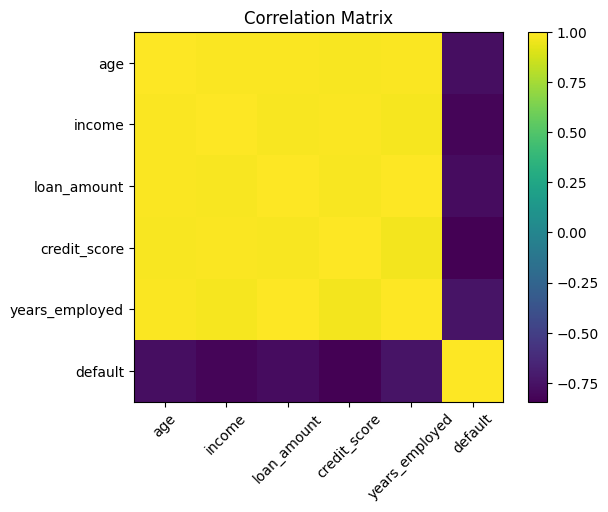

In [5]:
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


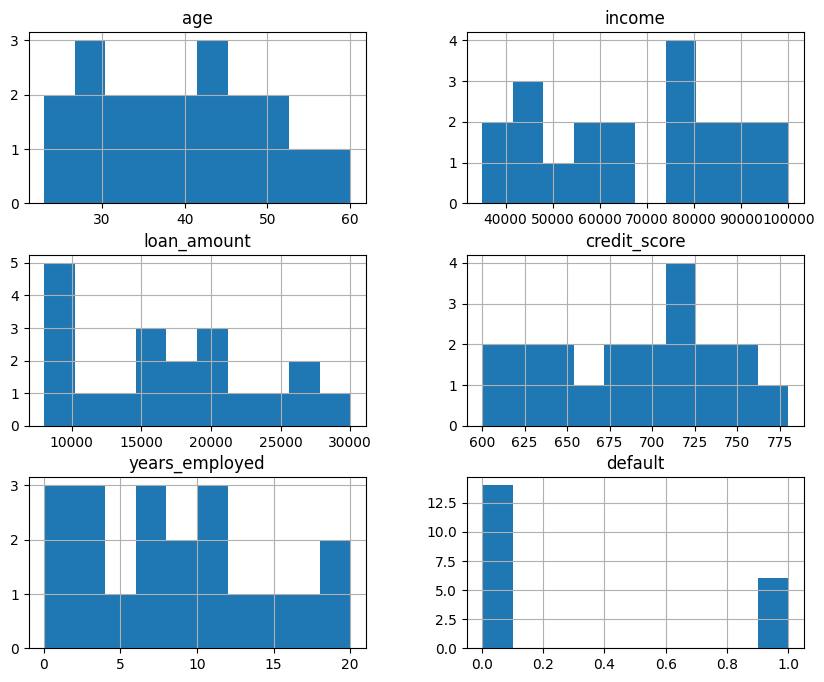

In [6]:
df.hist(figsize=(10,8))
plt.show()


In [7]:
X = df.drop("default", axis=1)
y = df["default"]


In [9]:
print(X)
print(y)

    age  income  loan_amount  credit_score  years_employed
0    25   40000        10000           620               1
1    45   80000        20000           720              10
2    35   60000        15000           680               5
3    50   90000        25000           750              15
4    23   35000         8000           600               0
5    40   75000        18000           710               8
6    60  100000        30000           780              20
7    48   85000        22000           730              12
8    33   58000        14000           670               6
9    29   45000         9000           630               2
10   55   95000        27000           760              18
11   38   62000        16000           690               7
12   42   78000        19000           705               9
13   27   42000         8500           610               1
14   31   50000        12000           650               3
15   46   82000        21000           725              

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
new_y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, new_y_pred))
print(confusion_matrix(y_test, new_y_pred))
print(classification_report(y_test, new_y_pred))


Accuracy: 0.75
[[3 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf.predict(X_test)


In [19]:
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RF Accuracy: 1.0
[[3 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

